In [2]:
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [3]:
df = pd.read_excel("df_train_cleaned.xlsx")

In [4]:
df.shape

(77271, 17)

In [5]:
df.columns

Index(['Unnamed: 0', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'],
      dtype='object')

In [ ]:
df.corr()

- monthly debt/annual income
- monthly debt/number of open accounts 
- monthly debt/current credit balance 
- monthly debt/ maximum open credit

- number of credit problems / bankruptcies 
- number of credit problems / tax liens 

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [7]:
df

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412,Short Term,709,1167493,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746,1,0
1,Fully Paid,99999999,Short Term,741,2231892,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090,0,0
2,Fully Paid,347666,Long Term,721,806949,3 years,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958,0,0
3,Charged Off,206602,Short Term,7290,896857,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6,0,215308,272448,0,0
4,Fully Paid,217646,Short Term,730,1184194,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13,1,122170,272052,1,0
5,Fully Paid,548746,Short Term,678,2559110,2 years,Rent,Debt Consolidation,18660.28,22.6,4,0,437171,555038,0,0
6,Fully Paid,215952,Short Term,739,1454735,< 1 year,Rent,Debt Consolidation,39277.75,13.9,20,0,669560,1021460,0,0
7,Fully Paid,99999999,Short Term,728,714628,3 years,Rent,Debt Consolidation,11851.06,16.0,16,0,203965,289784,0,0
8,Fully Paid,99999999,Short Term,740,776188,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,6,0,134083,220220,0,0
9,Fully Paid,99999999,Short Term,743,1560907,4 years,Rent,Debt Consolidation,17560.37,13.3,10,1,225549,496474,1,0


In [8]:
#credit range 350-830 avg
newcreditscore = []
for credit in df['Credit Score']: 
    if credit > 800:
        newcreditscore.append(credit/10)
    else: 
        newcreditscore.append(credit)

df['Credit_Score'] = newcreditscore
df.drop(['Credit Score'], axis = 1 , inplace = True)

In [9]:
#export dataframe

df_cleaned = pd.DataFrame(data = df)
df.to_csv('df_cleaned.csv', index=False, header=True)

In [10]:
#bin credit score (source: experian)
#https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/
#bins - 300-579, 580-669, 670-739, 740-799, 800-850
bins = [300, 580, 670, 740, 800, 850]
group_names = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

df['Credit Rating'] = pd.cut(df['Credit_Score'], bins, labels=group_names)
df.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit_Score,Credit Rating
0,Fully Paid,445412,Short Term,1167493,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746,1,0,709.0,Good
1,Fully Paid,99999999,Short Term,2231892,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090,0,0,741.0,Very Good
2,Fully Paid,347666,Long Term,806949,3 years,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958,0,0,721.0,Good
3,Charged Off,206602,Short Term,896857,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6,0,215308,272448,0,0,729.0,Good
4,Fully Paid,217646,Short Term,1184194,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,13,1,122170,272052,1,0,730.0,Good


In [11]:
df1 = df.copy()

In [12]:
#Years of Employment - major factor in deciding financial stability and secure income source
yearsinemployment = []

for years in df['Years in current job']:
    #filter(lambda x: x.isdigit(), years)
    yr = ''.join(filter(lambda x : x.isdigit(), years))
    yearsinemployment.append(yr)

#df1['Years in current job']
yearsinemployment
df['Years in Current Job'] = yearsinemployment
df.drop(['Years in current job'], axis=1, inplace = True)

In [13]:
df.head()

,Loan Status,Current Loan Amount,Term,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit_Score,Credit Rating,Years in Current Job
0,Fully Paid,445412,Short Term,1167493,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746,1,0,709.0,Good,8
1,Fully Paid,99999999,Short Term,2231892,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090,0,0,741.0,Very Good,8
2,Fully Paid,347666,Long Term,806949,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958,0,0,721.0,Good,3
3,Charged Off,206602,Short Term,896857,Home Mortgage,Debt Consolidation,16367.74,17.3,6,0,215308,272448,0,0,729.0,Good,10
4,Fully Paid,217646,Short Term,1184194,Home Mortgage,Debt Consolidation,10855.08,19.6,13,1,122170,272052,1,0,730.0,Good,1


In [19]:
#Encode loan status (fully paid = 0, charged off = 1)
loan_status = []

for status in df['Loan Status']: 
    if status == 'Fully Paid': 
        status = 0
        loan_status.append(status)
    else: 
        status = 1
        loan_status.append(status)
        
df['Loan_Status'] = loan_status

In [20]:
term = []
#short term = 0, long term = 1
for t in df['Term']: 
    if t == 'Short Term': 
        t = 0
        term.append(t)
    else: 
        t = 1 
        term.append(t)

df['term'] = term

In [ ]:
#df.drop(['Term'], axis = 1, inplace = True)
#df.drop(['Loan Status'], axis=1, inplace = True)

In [14]:
df

,Loan Status,Current Loan Amount,Term,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit_Score,Credit Rating,Years in Current Job
0,Fully Paid,445412,Short Term,1167493,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746,1,0,709.0,Good,8
1,Fully Paid,99999999,Short Term,2231892,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090,0,0,741.0,Very Good,8
2,Fully Paid,347666,Long Term,806949,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958,0,0,721.0,Good,3
3,Charged Off,206602,Short Term,896857,Home Mortgage,Debt Consolidation,16367.74,17.3,6,0,215308,272448,0,0,729.0,Good,10
4,Fully Paid,217646,Short Term,1184194,Home Mortgage,Debt Consolidation,10855.08,19.6,13,1,122170,272052,1,0,730.0,Good,1
5,Fully Paid,548746,Short Term,2559110,Rent,Debt Consolidation,18660.28,22.6,4,0,437171,555038,0,0,678.0,Good,2
6,Fully Paid,215952,Short Term,1454735,Rent,Debt Consolidation,39277.75,13.9,20,0,669560,1021460,0,0,739.0,Good,1
7,Fully Paid,99999999,Short Term,714628,Rent,Debt Consolidation,11851.06,16.0,16,0,203965,289784,0,0,728.0,Good,3
8,Fully Paid,99999999,Short Term,776188,Own Home,Debt Consolidation,11578.22,8.5,6,0,134083,220220,0,0,740.0,Good,1
9,Fully Paid,99999999,Short Term,1560907,Rent,Debt Consolidation,17560.37,13.3,10,1,225549,496474,1,0,743.0,Very Good,4


In [31]:
#export dataframe

df_cleaned2 = pd.DataFrame(data = df)
df.to_csv('df_cleaned2.csv', index=False, header=True)

In [55]:
#Loan Amount
# = []
#for amt in df['Current Loan Amount']: 
#    if amt > :
#        newcreditscore.append(credit/10)
#    else: 
#        newcreditscore.append(credit)
#
#df['Credit_Score'] = newcreditscore
#df.drop(['Credit Score'], axis = 1 , inplace = True)

In [20]:
#Loan Amount 
outliers = df['Current Loan Amount'] > 95000000


0    False
1     True
2    False
3    False
4    False
Name: Current Loan Amount, dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253949A6710>,
      dtype=object)

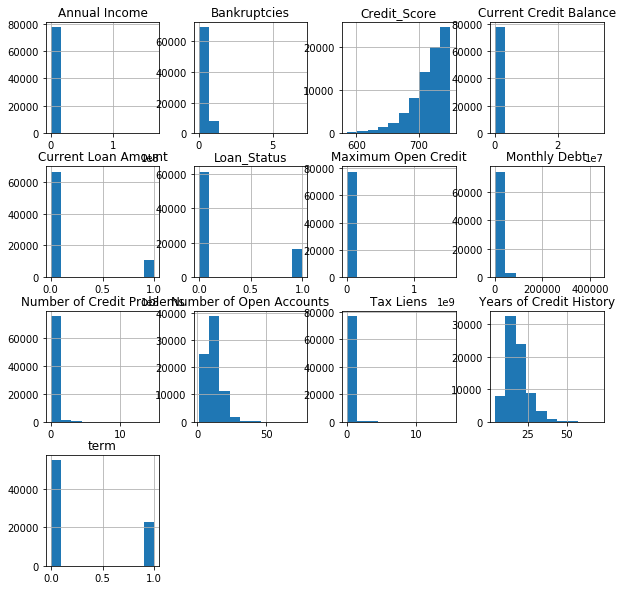

In [23]:
df.hist(figsize=(10,10))

In [ ]:
#df.hist(figsize=(10,10), sharex=True)

In [27]:
#credit score normalization
credit_mean = df['Credit_Score'].mean()
credit_std = df['Credit_Score'].std()
credit_manual = (df['Credit_Score'] - credit_mean)/credit_std

In [28]:
credit_mean, credit_std

(716.2620129155828, 28.3479232623364)

In [29]:
credit_manual.head()

0   -0.256174
1    0.872656
2    0.167137
3    0.449345
4    0.484621
Name: Credit_Score, dtype: float64

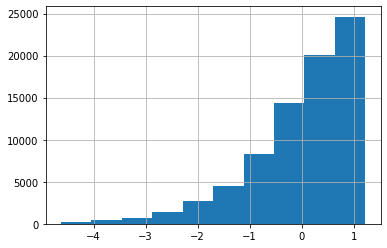

In [30]:
credit_manual.hist()

In [ ]:
for purpose in df['Purpose']: 
    if purpose == 'Debt Consolidation': 
        df.corr()